# IT326 Project - Phase2

### Summary

In [2]:
import pandas as pd
df = pd.read_csv('b_depressed.csv')

<ipython-input-2-4a28a99f4a35>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
summary_stats=df.describe();
print(summary_stats);

        Survey_id     Ville_id          sex          Age      Married  \
count  1429.00000  1429.000000  1429.000000  1429.000000  1429.000000   
mean    715.00000    76.286214     0.918125    34.777467     0.772568   
std     412.66108    66.444012     0.274271    13.986219     0.419320   
min       1.00000     1.000000     0.000000    17.000000     0.000000   
25%     358.00000    24.000000     1.000000    25.000000     1.000000   
50%     715.00000    57.000000     1.000000    30.000000     1.000000   
75%    1072.00000   105.000000     1.000000    42.000000     1.000000   
max    1429.00000   292.000000     1.000000    91.000000     1.000000   

       Number_children  education_level  total_members  gained_asset  \
count      1429.000000      1429.000000    1429.000000  1.429000e+03   
mean          2.883135         8.687194       4.969209  3.363448e+07   
std           1.874472         2.923532       1.786317  2.003854e+07   
min           0.000000         1.000000       1.000000

### Sample of 20 participants

In [4]:
sample=df.sample(n=20);
print(sample);

      Survey_id  Ville_id  sex  Age  Married  Number_children  \
530         675        23    1   36        1                2   
303         610       116    1   26        1                3   
167        1325        79    1   26        0                4   
249        1282        64    1   35        1                1   
1364        314        19    1   47        1                2   
1107        167        12    1   23        0                3   
480         971        50    1   32        1                4   
474         105        22    1   23        1                1   
238        1112        13    1   53        1                0   
262        1161       181    1   40        1                0   
205        1345        94    1   21        1                2   
105         940       141    1   23        1                2   
669         672        50    1   28        1                5   
128         384        32    1   28        0                3   
743        1026        54

### Missing values

In [5]:
missing_values = df.isna().sum()
print(missing_values)

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64


### Graphs & Tables

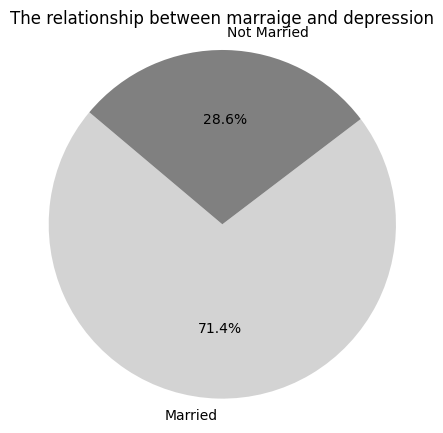

In [10]:
import matplotlib.pyplot as plt
df['Married'] = df['Married'].replace({1: 'Married', 0: 'Not Married'})
depressed_df = df[df['depressed'] == 1]
marriage_count = depressed_df['Married'].value_counts()
plt.figure(figsize=(5, 5));
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', startangle=140, colors=['lightgray','gray']);
plt.title('The relationship between marraige and depression');
plt.axis('equal');
plt.show();

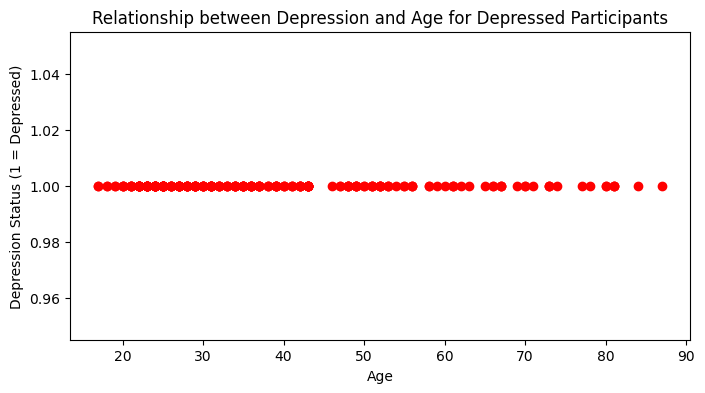

In [11]:
depressed = df[df['depressed'] == 1]
plt.figure(figsize=(8, 4))
plt.scatter(depressed['Age'], depressed['depressed'], color='red')
plt.xlabel('Age')
plt.ylabel('Depression Status (1 = Depressed)')
plt.title('Relationship between Depression and Age for Depressed Participants')
plt.show()

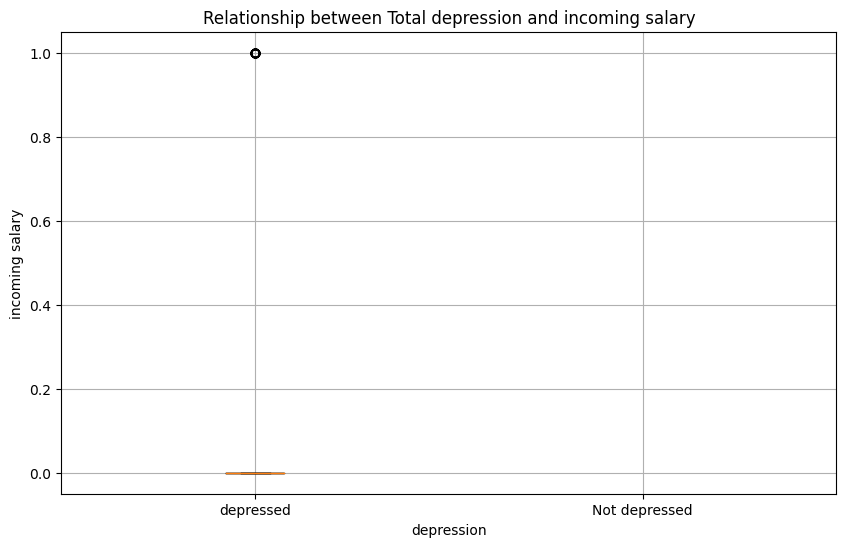

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['depressed'] == 1]['incoming_salary'], df[df['depressed'] == 2]['incoming_salary']], labels=['depressed', 'Not depressed'])
plt.xlabel('depression')
plt.ylabel('incoming salary')
plt.title('Relationship between Total depression and incoming salary')
plt.grid(True)
plt.show()

In [13]:
variance= df.var(numeric_only=True);
print(variance);

Survey_id                1.702892e+05
Ville_id                 4.414807e+03
sex                      7.522449e-02
Age                      1.956143e+02
Number_children          3.513644e+00
education_level          8.547042e+00
total_members            3.190928e+00
gained_asset             4.015430e+14
durable_asset            3.296665e+14
save_asset               3.151113e+14
living_expenses          4.416422e+14
other_expenses           4.710053e+14
incoming_salary          1.476047e-01
incoming_own_farm        1.885905e-01
incoming_business        9.622113e-02
incoming_no_business     1.926893e-01
incoming_agricultural    4.317445e+14
farm_expenses            4.462114e+14
labor_primary            1.679986e-01
lasting_investment       4.501275e+14
no_lasting_investmen     4.666585e+14
depressed                1.389083e-01
dtype: float64


In [19]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='depressed', y='Age', data=df, palette="Set2")

plt.xlabel('Depressed (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Boxplot of Age Distribution by Depression Status')

plt.show()

<class 'OSError'>: Not available

In [20]:

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# Step 1: Fill missing values in 'no_lasting_investmen' with the mean
imputer = SimpleImputer(strategy='mean')
df['no_lasting_investmen'] = imputer.fit_transform(df[['no_lasting_investmen']])

# Step 2: Discretize 'Age' into 'Youth', 'Adult', 'Senior'
age_bins = [0, 24, 59, float('inf')]
age_labels = ['Youth', 'Adult', 'Senior']
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# Step 3: Scale other numerical features using MinMaxScaler
numerical_features = ['incoming_salary', 'incoming_own_farm', 
                      'incoming_business', 'incoming_no_business', 'incoming_agricultural', 
                      'labor_primary', 'lasting_investment', 'no_lasting_investmen', 'total_assets', 'total_expenses']

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 4: One-hot encode categorical features including the new 'Age_group' column
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(df[['education_level', 'Age_group']])

# Create a DataFrame for the encoded columns and merge back into the dataset
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['education_level', 'Age_group']))
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'education_level' and 'Age_group' columns after encoding
df.drop(columns=['education_level', 'Age_group'], inplace=True)

# Test the transformations
print("Scaled numerical features:")
print(df[numerical_features].head())

print("\nOne-hot encoded categorical features:")
print(encoded_df.head())


<class 'KeyError'>: "['total_assets', 'total_expenses'] not in index"

In [21]:
# Aggregating asset-related columns into a new 'total_assets' column
df['total_assets'] = df[['gained_asset', 'durable_asset', 'save_asset']].sum(axis=1)
d()
# Aggregating expense-related columns into a new 'total_expenses' column
df['total_expenses'] = df[['living_expenses', 'other_expenses', 'farm_expenses']].sum(axis=1)

# Drop the original asset and expense columns if no longer needed
df.drop(columns=['gained_asset', 'durable_asset', 'save_asset', 'living_expenses', 'other_expenses', 'farm_expenses'], inplace=True)

# Test the new columns
print(df[['total_assets', 'total_expenses']].hea)


<class 'NameError'>: name 'd' is not defined

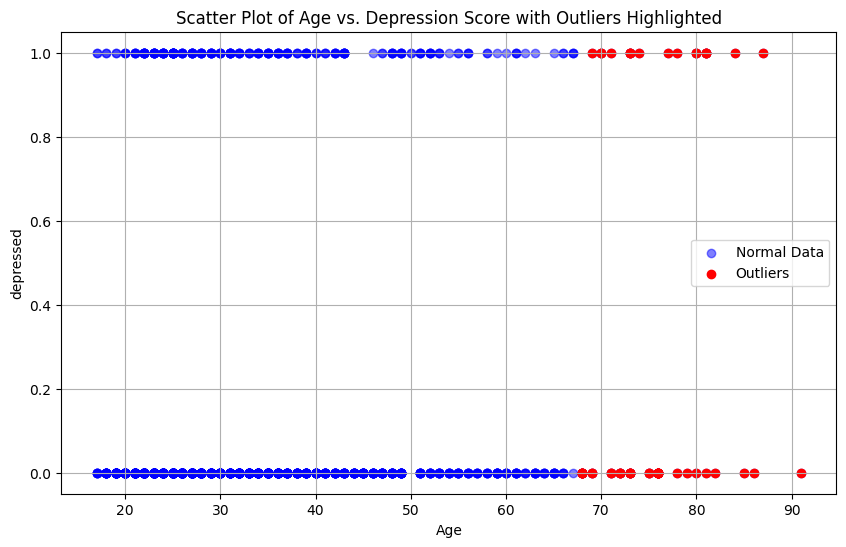

In [22]:
import matplotlib.pyplot as plt
# Define outliers based on IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Create scatter plot with highlighted outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['depressed'], color='blue', alpha=0.5, label='Normal Data')
plt.scatter(outliers['Age'], outliers['depressed'], color='red', label='Outliers')
plt.title('Scatter Plot of Age vs. Depression Score with Outliers Highlighted')
plt.xlabel('Age')
plt.ylabel('depressed')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# if sample ::::::::::::::::::::::::::::::::::::::
print("the age after discretization")
age_bins = [0, 25, 60, df['Age'].max()]
age_labels = ['Youth', 'Adult', 'Senior']
sample['Age_Group'] = pd.cut(sample['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
print(sample[['Age', 'Age_Group']].to_string())


the age after discretization
      Age Age_Group
530    36     Adult
303    26     Adult
167    26     Adult
249    35     Adult
1364   47     Adult
1107   23     Youth
480    32     Adult
474    23     Youth
238    53     Adult
262    40     Adult
205    21     Youth
105    23     Youth
669    28     Adult
128    28     Adult
743    43     Adult
840    24     Youth
600    22     Youth
540    35     Adult
481    43     Adult
999    24     Youth


In [26]:
# if raw data ::::::::::::::::::::::::::::::::::::
print("the age after discretization")
age_bins = [0, 25, 60, df['Age'].max()]
age_labels = ['Youth', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
print(df[['Age', 'Age_Group']].to_string())

the age after discretization
      Age Age_Group
0      28     Adult
1      23     Youth
2      22     Youth
3      27     Adult
4      59     Adult
5      35     Adult
6      34     Adult
7      21     Youth
8      32     Adult
9      29     Adult
10     84    Senior
11     59     Adult
12     38     Adult
13     27     Adult
14     56     Adult
15     24     Youth
16     25     Youth
17     44     Adult
18     32     Adult
19     26     Adult
20     40     Adult
21     55     Adult
22     34     Adult
23     43     Adult
24     51     Adult
25     28     Adult
26     53     Adult
27     26     Adult
28     23     Youth
29     36     Adult
30     27     Adult
31     44     Adult
32     40     Adult
33     19     Youth
34     27     Adult
35     31     Adult
36     27     Adult
37     27     Adult
38     35     Adult
39     43     Adult
40     22     Youth
41     41     Adult
42     20     Youth
43     18     Youth
44     38     Adult
45     24     Youth
46     26     Adult
47     26  